In [ ]:
#Linear Models for Classification

In [ ]:
# predict the class or category.

In [2]:
import urllib.request 
import pandas as pd

train_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_test.csv'


def download_read_data(path):
    

    """
    Function to retrieve data from the data paths
    And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    # Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(str(data_path))

    return data

In [3]:
# Getting train data 

mobile_train = download_read_data(train_data_path)

In [4]:
mobile_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Getting test data 

mobile_test = download_read_data(test_data_path)
# mobile_test.head(2)

In [6]:
# Looking at tail (last rows) of the data 

mobile_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [7]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# Checking the number of data points/size of the data
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(mobile_train), len(mobile_test)))

The size of training data is: 2000 
The size of testing data is: 1000


In [9]:
# Checking the number of features
len(mobile_train.columns)

21

In [10]:
train_data = mobile_train.copy()

In [11]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<AxesSubplot:>

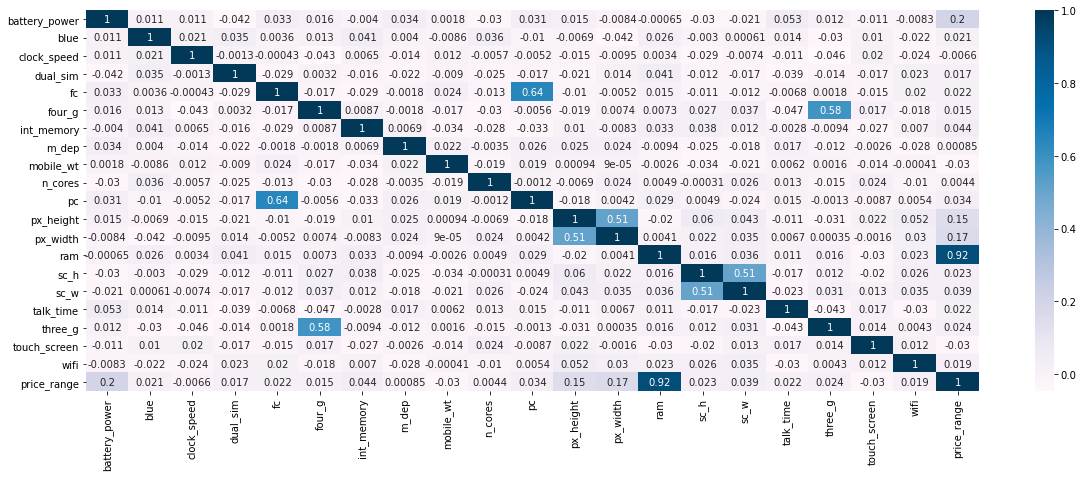

In [15]:
# Visualizing correlation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.heatmap(correlation, annot=True, cmap='PuBu')

In [16]:
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mobile Price Ranges')

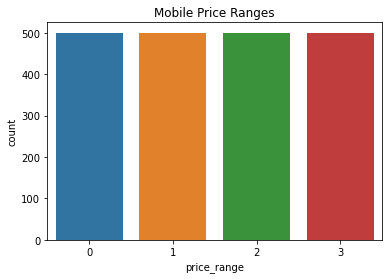

In [17]:
sns.countplot(mobile_train['price_range'])
plt.title('Mobile Price Ranges')

Text(0.5, 1.0, 'Number of Cores')

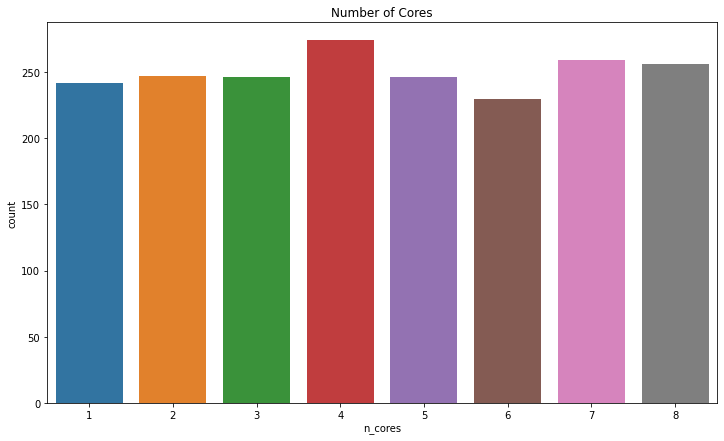

In [18]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores')
plt.title('Number of Cores')

Text(0.5, 1.0, 'Number of Cores')

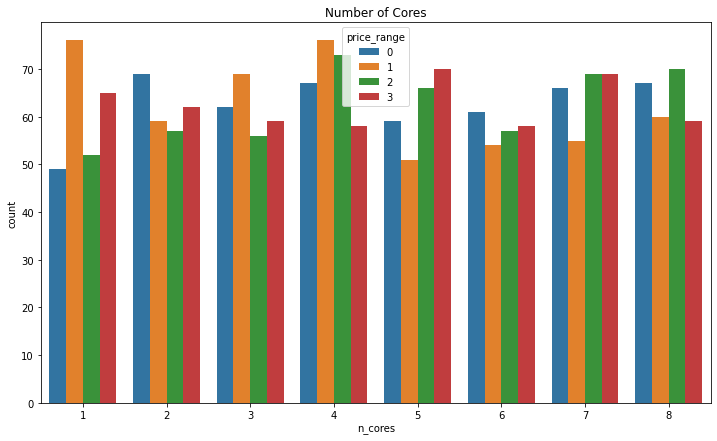

In [19]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores', hue='price_range')
plt.title('Number of Cores')

<AxesSubplot:xlabel='mobile_wt', ylabel='Count'>

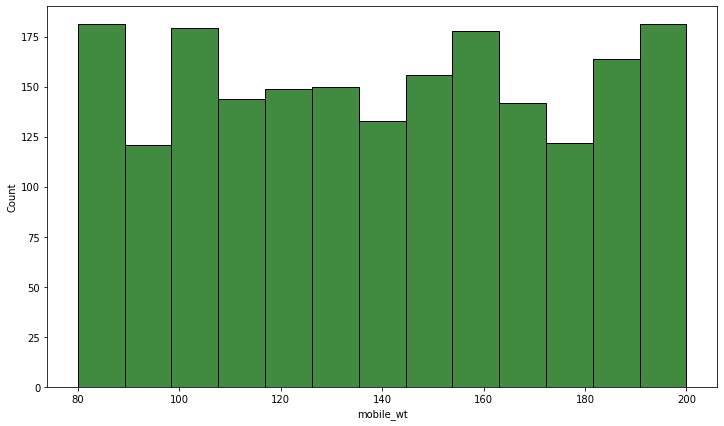

In [20]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', color='darkgreen')

<AxesSubplot:xlabel='mobile_wt', ylabel='Count'>

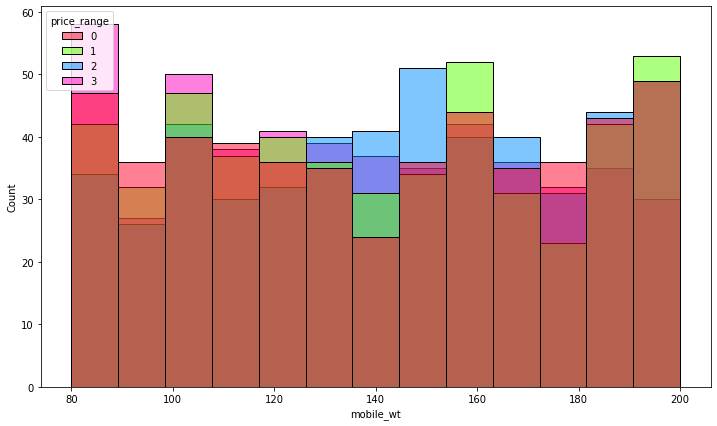

In [21]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', palette='gist_rainbow', hue='price_range')

<AxesSubplot:xlabel='ram', ylabel='Count'>

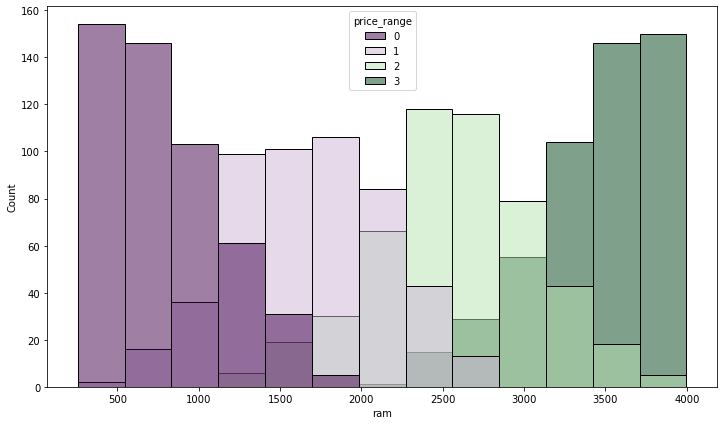

In [22]:
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', palette='PRGn', hue='price_range')

<AxesSubplot:xlabel='n_cores', ylabel='ram'>

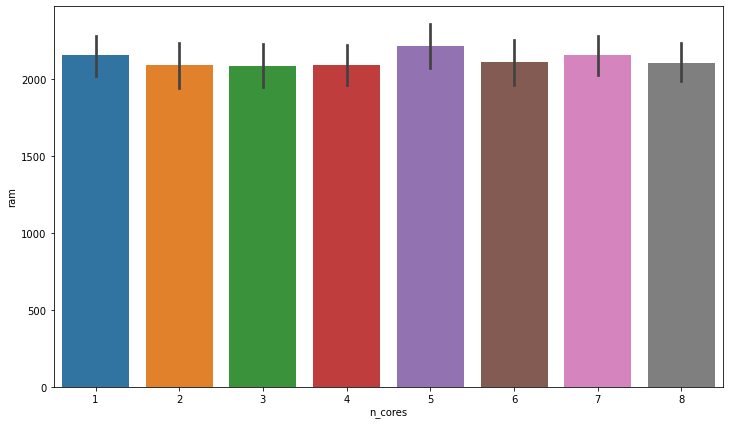

In [23]:
plt.figure(figsize=(12,7))

sns.barplot(data=mobile_train, x='n_cores', y='ram')

Text(0.5, 1.0, 'Front Camera Vs Primary Camera')

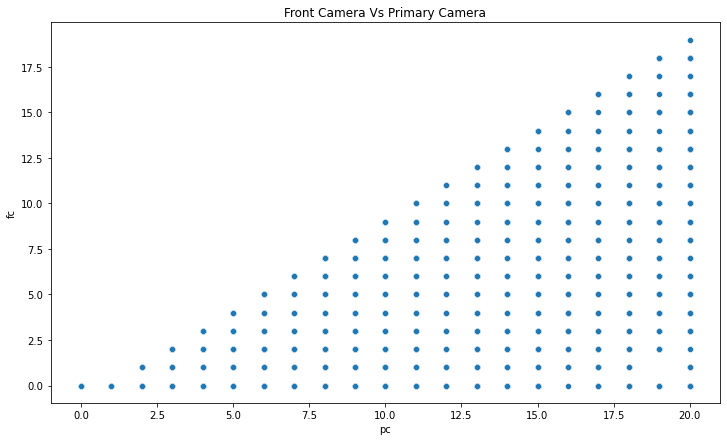

In [24]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=mobile_train, x='pc', y='fc')
plt.title('Front Camera Vs Primary Camera')

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

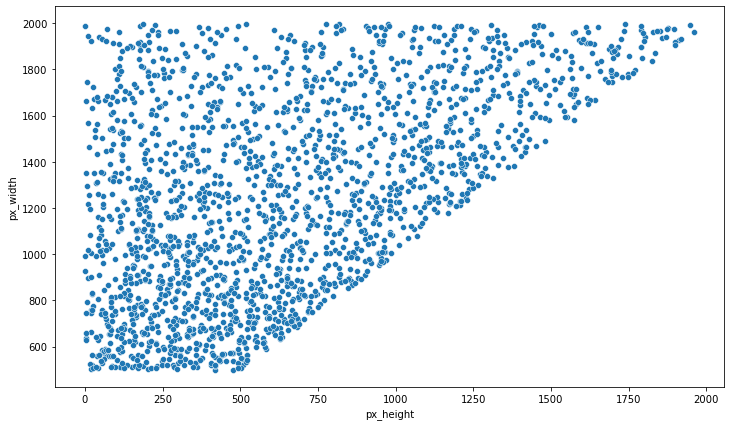

In [25]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='px_height', y='px_width')

<AxesSubplot:xlabel='battery_power', ylabel='talk_time'>

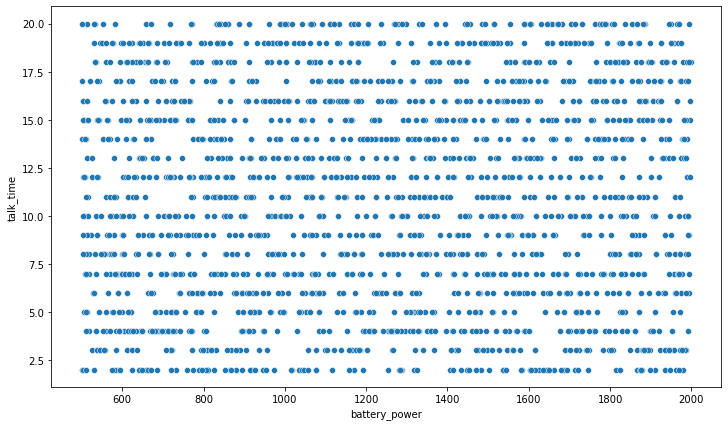

In [26]:
plt.figure(figsize=(12,7))

sns.scatterplot(data=mobile_train, x='battery_power', y='talk_time')

The number of mobiles that have bluetooth: 990
The number of mobiles that don't have bluetooth: 1010


<AxesSubplot:ylabel='blue'>

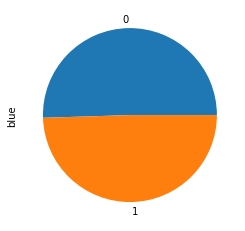

In [27]:
# Displaying number of phones which have or don't have bluetooth 
blue_count = mobile_train['blue'].value_counts()

print("The number of mobiles that have bluetooth: {}\nThe number of mobiles that don't have bluetooth: {}".format(blue_count[1], blue_count[0]))

blue_count.plot(kind='pie')

The number of mobiles that have Wifi: 1014
The number of mobiles that don't have Wifi: 986


<AxesSubplot:ylabel='wifi'>

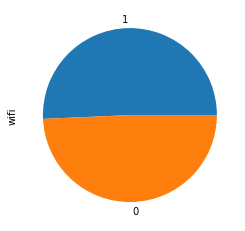

In [28]:
# Displaying number of phones which have or don't have wifi
wifi_count = mobile_train['wifi'].value_counts()

print("The number of mobiles that have Wifi: {}\nThe number of mobiles that don't have Wifi: {}".format(wifi_count[1], wifi_count[0]))

wifi_count.plot(kind='pie')

The number of mobiles that have dual sim capacity: 1019
The number of mobiles that don't have dual sim capacity: 981


<AxesSubplot:ylabel='dual_sim'>

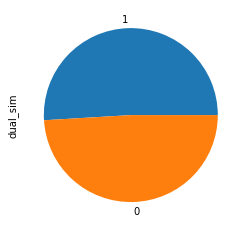

In [29]:
# Displaying number of phones which have or don't have dual simcards
sim_count = mobile_train['dual_sim'].value_counts()

print("The number of mobiles that have dual sim capacity: {}\nThe number of mobiles that don't have dual sim capacity: {}".format(sim_count[1], sim_count[0]))

sim_count.plot(kind='pie')

The number of mobiles that have 3G capacity: 1523
The number of mobiles that don't have 3G capacity: 477


<AxesSubplot:ylabel='three_g'>

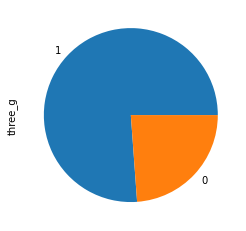

In [30]:
# Displaying number of phones which have or don't have 3g
count_3g = mobile_train['three_g'].value_counts()

print("The number of mobiles that have 3G capacity: {}\nThe number of mobiles that don't have 3G capacity: {}".format(count_3g[1], count_3g[0]))

count_3g.plot(kind='pie')

The number of mobiles that have 4G capacity: 1043
The number of mobiles that don't have 4G capacity: 957


<AxesSubplot:ylabel='four_g'>

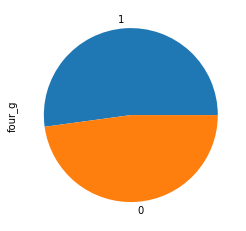

In [31]:
# Displaying number of phones which have or don't have 4g

count_4g = mobile_train['four_g'].value_counts()
print("The number of mobiles that have 4G capacity: {}\nThe number of mobiles that don't have 4G capacity: {}".format(count_4g[1], count_4g[0]))

count_4g.plot(kind='pie')

The number of mobiles that have touch screens: 1006
The number of mobiles that don't have touch screen: 994


<AxesSubplot:ylabel='touch_screen'>

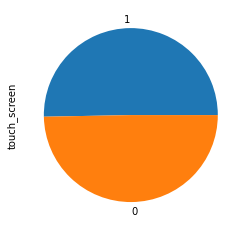

In [32]:
# Displaying number of phones which have or don't have touchscreen

touch_scr = mobile_train['touch_screen'].value_counts()

print("The number of mobiles that have touch screens: {}\nThe number of mobiles that don't have touch screen: {}".format(touch_scr[1], touch_scr[0]))

touch_scr.plot(kind='pie')

In [33]:
# sns.pairplot??

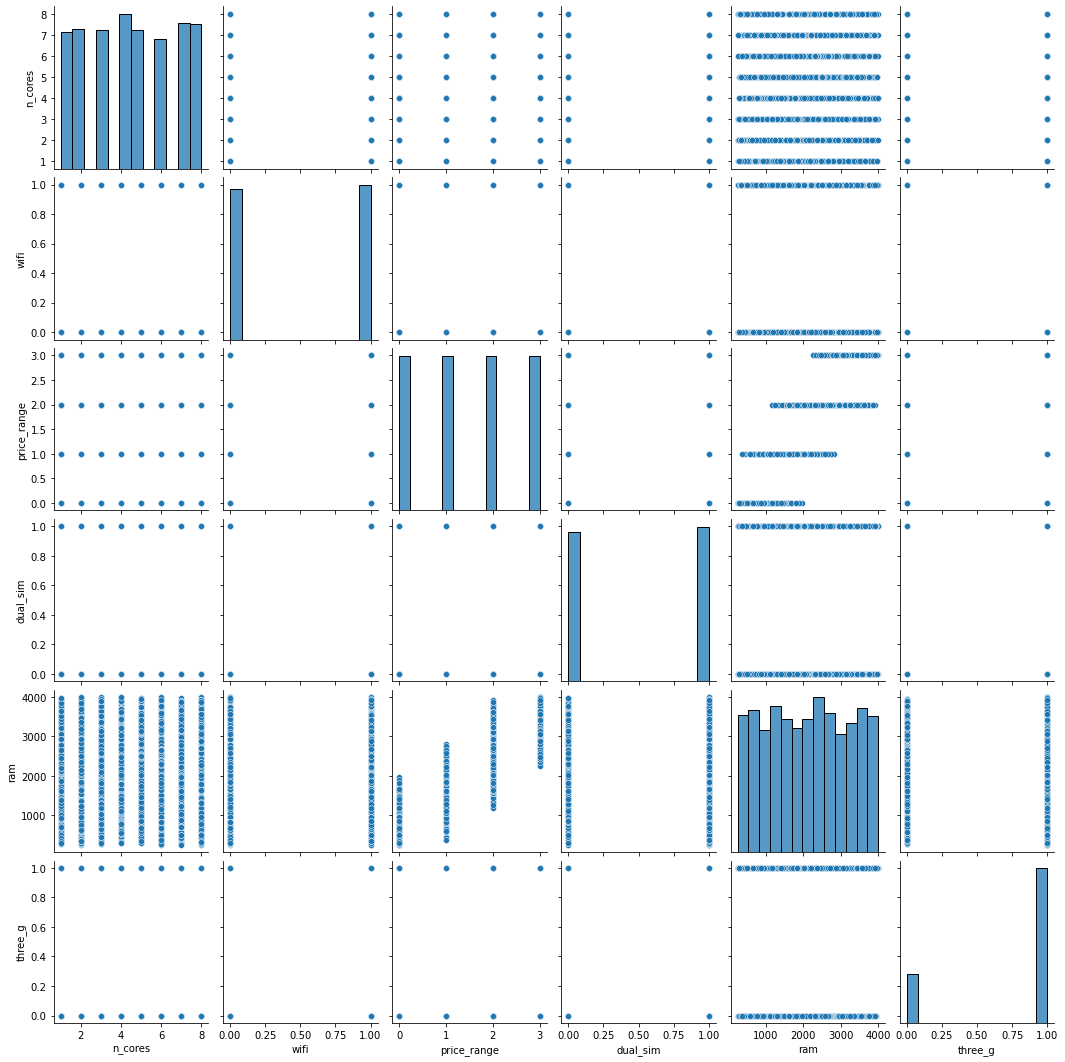

In [34]:
sns.pairplot(mobile_train, vars=['n_cores', 'wifi', 'price_range', 'dual_sim', 'ram', 'three_g'])

In [ ]:
 #Data Preprocessing

In [40]:
training_input_data = mobile_train.drop('price_range', axis=1)
training_labels = mobile_train['price_range']

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def scale_feats(num_input_data):

  """
  Take input numerical data and return the normalized data

  """

  normalized_data = scaler.fit_transform(num_input_data)

  return normalized_data

In [42]:
training_final = scale_feats(training_input_data)

In [43]:
#Creating and Training a Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(training_final, training_labels)

LogisticRegression()

In [45]:
log_model.score(training_final, training_labels)

0.947

In [ ]:
#Let's train another linear classifier called SGD (Stockastic Gradient Descent) classifier on the same dataset.

In [46]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [47]:
sgd_clf.score(training_final, training_labels)

0.7975

In [ ]:
#but for now let's shift to other complex models a bit. Let's try a decision trees model.

In [48]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [49]:
tree_clf.score(training_final, training_labels)

1.0

In [50]:
 #Model Evaluation cross validation 10 different model scores.

In [51]:
# Let's hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, training_final, training_labels,
                         cv=10)


In [53]:
log_scores

array([0.915, 0.94 , 0.91 , 0.93 , 0.935, 0.94 , 0.92 , 0.925, 0.91 ,
       0.92 ])

In [54]:
log_scores.mean()

0.9245000000000001

In [55]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, training_final, training_labels,
                         cv=10)

In [56]:
sgd_scores

array([0.74 , 0.74 , 0.755, 0.755, 0.71 , 0.74 , 0.755, 0.775, 0.745,
       0.75 ])

In [57]:
sgd_scores.mean()

0.7465

In [58]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, training_final, training_labels,
                         cv=10)

In [59]:
tree_scores

array([0.83 , 0.875, 0.82 , 0.795, 0.86 , 0.855, 0.825, 0.815, 0.855,
       0.8  ])

In [60]:
tree_scores.mean()

0.833

In [62]:
from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train = cross_val_predict(log_model, training_final, training_labels,
                         cv=10)

In [63]:
#More intuitively, a confusion matrix is made of 4 main elements: True negatives, false negatives, true positives, and false positives.

#True Positives(TP): Number of samples that are correctly classified as positive, and their actual label is positive.

#False Positives (FP): Number of samples that are incorrectly classified as positive, when in fact their actual label is negative.

#True Negatives (TN): Number of samples that are correctly classified as negative, and their actual label is negative.

#False Negatives (FN): Number of samples that are incorrectly classified as negative, when in fact their actual label is positive.

In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(training_labels, predictions_on_train)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]])

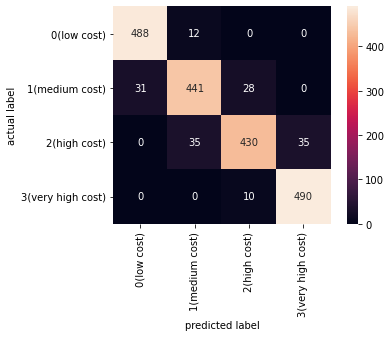

In [65]:
cm = confusion_matrix(training_labels, predictions_on_train)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'],
                        yticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train)

0.9245

In [67]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

